In [1]:
%matplotlib notebook

from rlsm.datasets import load_spanish_highschool
from rlsm import ReciprocityLSM

In [2]:
Y, features = load_spanish_highschool()

In [3]:
model = ReciprocityLSM(n_features=2, reciprocity_type='distance', random_state=42)
model.sample(Y, n_warmup=2500, n_samples=5000)

sample: 100%|████████████████████████████████████████████████████████████████| 7500/7500 [12:43<00:00,  9.82it/s, 127 steps of size 4.19e-02. acc. prob=0.84]


In [4]:
model.print_summary()

AUC: 0.962, WAIC: 12062.905

                  mean       std    median      2.5%     97.5%     n_eff     r_hat
  recip_coef      2.09      0.17      2.09      1.73      2.41   2106.88      1.00
   dist_coef     -0.33      0.09     -0.33     -0.51     -0.16   1667.82      1.00
       s_var      3.87      0.51      3.84      2.91      4.88    582.04      1.00
       r_var      0.58      0.10      0.57      0.40      0.78   1037.80      1.00
     sr_corr     -0.23      0.09     -0.23     -0.41     -0.07   1415.38      1.00

Number of divergences: 1231


<IPython.core.display.Javascript object>


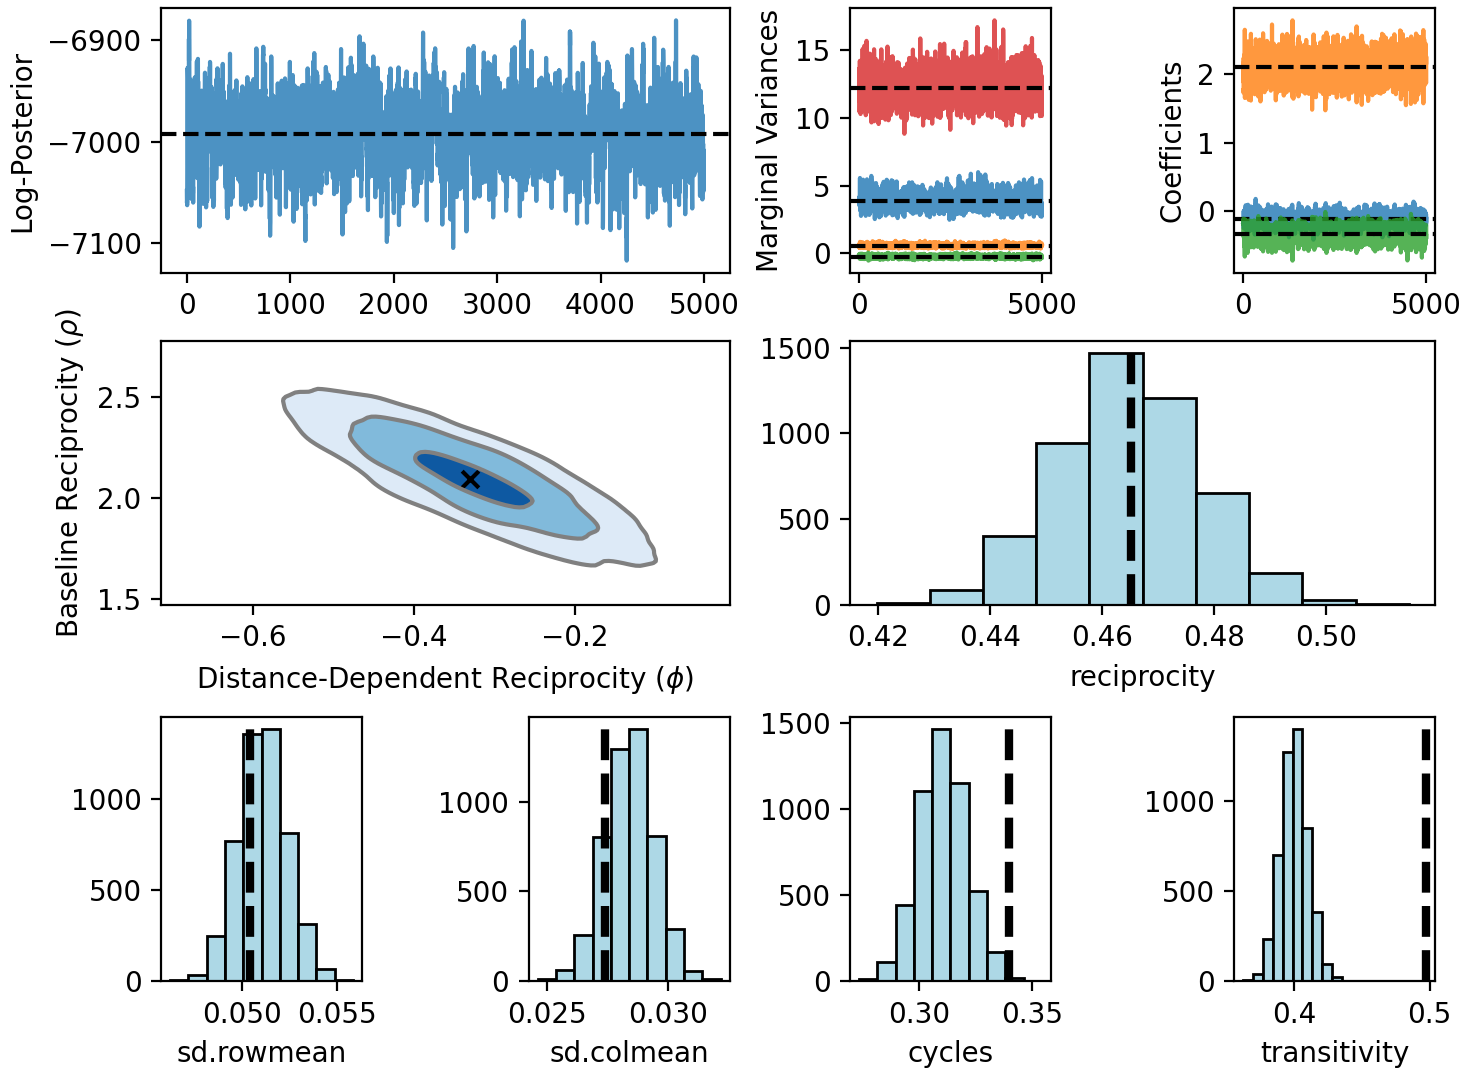

{'A': <Axes: label='A', ylabel='Log-Posterior'>,
 'B': <Axes: label='B', ylabel='Marginal Variances'>,
 'C': <Axes: label='C', ylabel='Coefficients'>,
 'D': <Axes: label='D', xlabel='Distance-Dependent Reciprocity ($\\phi$)', ylabel='Baseline Reciprocity ($\\rho$)'>,
 'E': <Axes: label='E', xlabel='reciprocity'>,
 'F': <Axes: label='F', xlabel='sd.rowmean'>,
 'G': <Axes: label='G', xlabel='sd.colmean'>,
 'H': <Axes: label='H', xlabel='cycles'>,
 'I': <Axes: label='I', xlabel='transitivity'>}

In [5]:
model.plot()

<IPython.core.display.Javascript object>


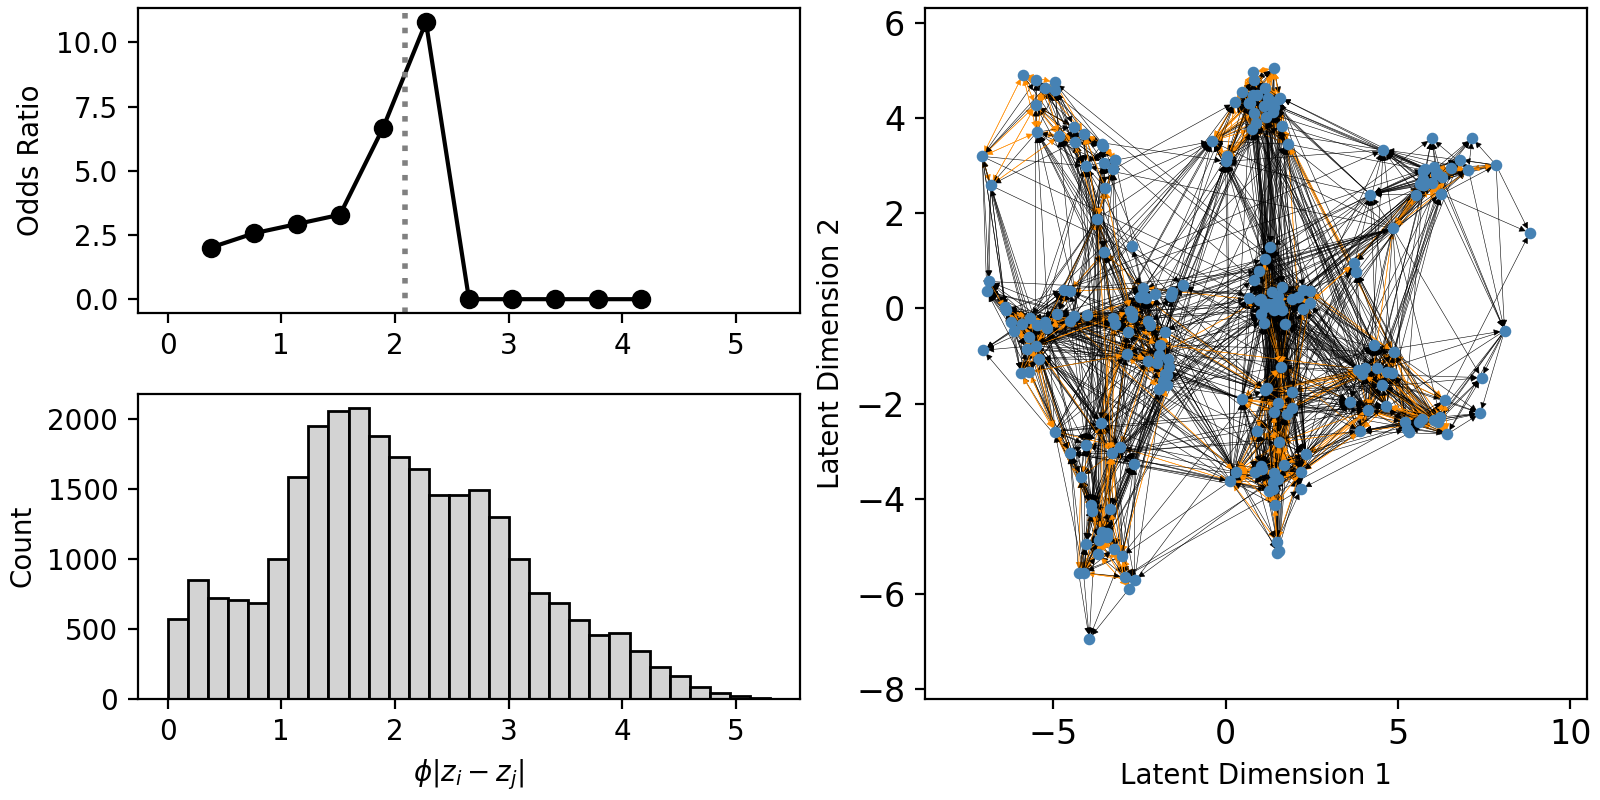

/var/folders/v3/2j2q_5r946l7qp1c47w5x7lc0000gn/T/ipykernel_34511/1475479900.py:13: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(pairwise_distance(model.Z_))


In [6]:
import networkx as nx

from rlsm.rlsm import pairwise_distance
from rlsm.network_utils import adjacency_to_dyads, dyads_to_multinomial

ax = plt.figure(constrained_layout=True, figsize=(8,4)).subplot_mosaic(
    """
    AABB
    CCBB
    """
)

D = np.sqrt(pairwise_distance(model.Z_))
d = np.abs(model.samples_['dist_coef'].mean())  * adjacency_to_dyads(D, n=D.shape[0])[:, 0]
dyads = adjacency_to_dyads(Y, n=D.shape[0])

res = []
qs = np.linspace(d.min(), d.max(), 15)
dist = []
for i in range(qs.shape[0]-1):
    a = dyads_to_multinomial(dyads[np.where(np.logical_and(d >= qs[i], d <= qs[i+1]))[0]])
    tots = a.sum(axis=0) 
    gamma = (tots[0] * tots[-1]) / (tots[1] * tots[2]) 
    if tots[1] * tots[2] > 0:
        res.append(gamma)
        dist.append(qs[i+1])

ax['C'].hist(d, bins=30, color='lightgray', edgecolor='k')#.histplot(d, axes=ax[0])
ax['A'].plot(np.asarray(dist), res, 'ko-')
ax['A'].set_ylabel('Odds Ratio')
ax['A'].axvline(model.recip_coef_, linestyle=':', color='gray', lw=2)
ax['C'].set_ylabel('Count')
ax['C'].set_xlabel(r'$\phi |z_i - z_j|$')

colors = np.asarray(["tomato", "steelblue", "goldenrod"])
g = nx.from_numpy_array(Y, create_using=nx.DiGraph)
pos = {k : model.Z_[k, :2] for k in range(Y.shape[0])}
elist = list(nx.to_edgelist(g))
ecolor = ['darkorange' if Y[e[1], e[0]] else 'black' for e in elist]
nx.draw_networkx(g, pos, 
                 node_color='steelblue',
                 edge_color=ecolor, width=0.2, arrowsize=5, with_labels=False,
                 node_size=10, ax=ax['B'])
ax['B'].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True,
                labelsize=12)
ax['B'].set_ylabel('Latent Dimension 2')
ax['B'].set_xlabel('Latent Dimension 1')
ax['A'].sharex(ax['C'])

<IPython.core.display.Javascript object>


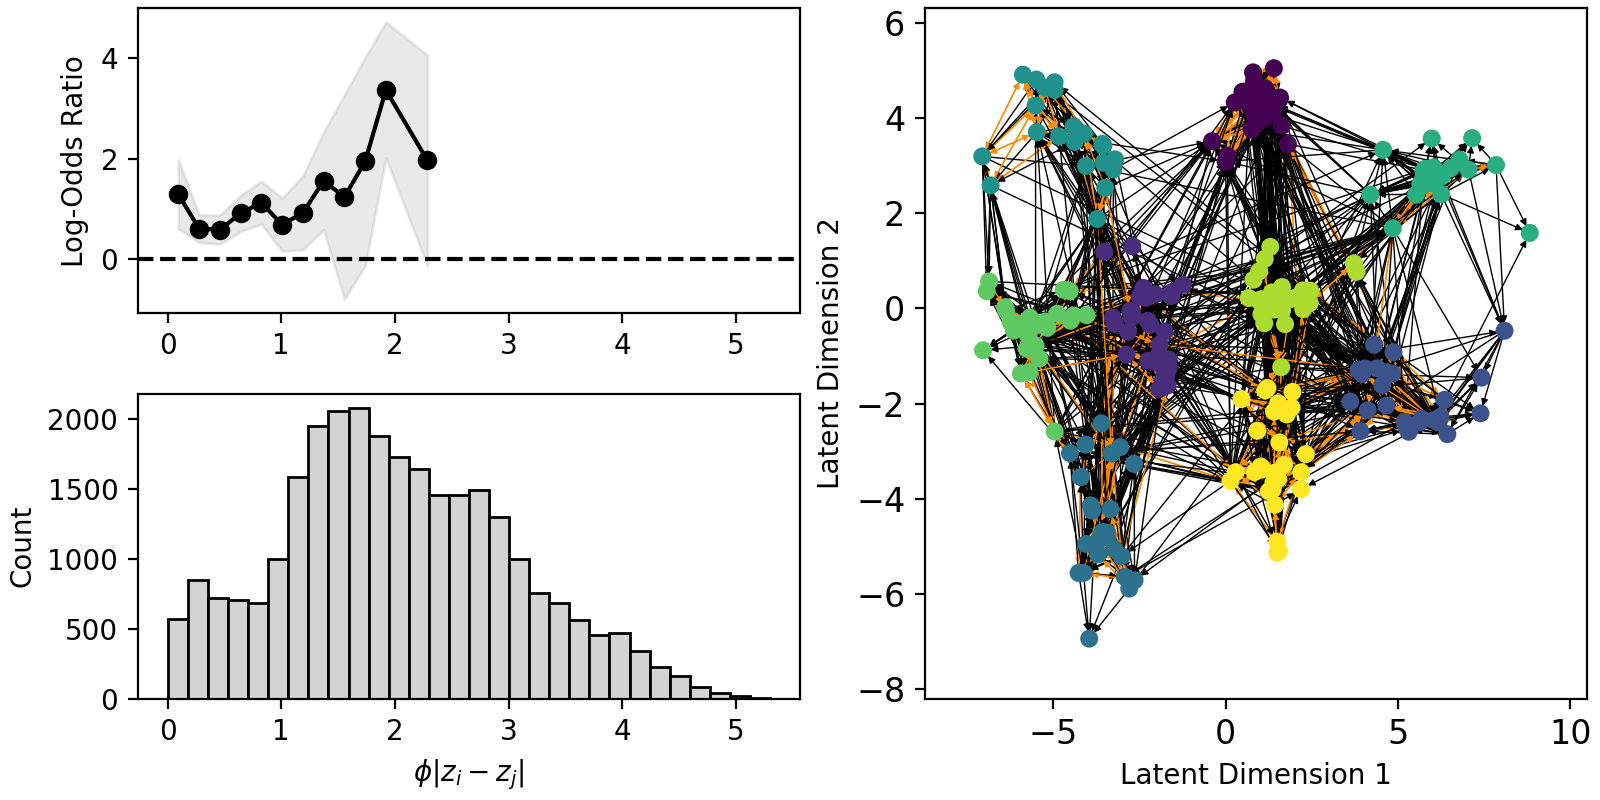

/var/folders/v3/2j2q_5r946l7qp1c47w5x7lc0000gn/T/ipykernel_51030/3006827678.py:13: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(pairwise_distance(model.Z_))


[113.  24.  31.  24.]
[349. 184. 177. 171.]
[167. 158. 171. 290.]
[ 75. 102. 123. 415.]
[ 45.  86.  82. 482.]
[ 21. 102.  73. 702.]
[   9.   86.   54. 1294.]
[   5.   45.   44. 1879.]
[1.000e+00 2.500e+01 2.400e+01 2.064e+03]
[1.000e+00 2.500e+01 1.200e+01 2.101e+03]
[   3.   12.   17. 1981.]
[   0.   23.   10. 1767.]
[1.000e+00 2.600e+01 9.000e+00 1.668e+03]
[   0.   22.    9. 1486.]
[   0.    9.    8. 1481.]
[   0.    8.    5. 1541.]
[   0.    6.    4. 1314.]
[  0.   1.   6. 989.]
[  0.   3.   2. 765.]
[  0.   1.   0. 710.]
[  0.   1.   1. 548.]
[  0.   1.   0. 477.]
[  0.   2.   1. 453.]
[  0.   0.   0. 314.]
[  0.   0.   1. 196.]
[  0.   0.   1. 141.]
[ 0.  0.  0. 61.]
[ 0.  0.  0. 31.]
[ 0.  0.  0. 11.]


In [22]:
from rlsm.rlsm import pairwise_distance
from rlsm.network_utils import adjacency_to_dyads, dyads_to_multinomial
import networkx as nx
from sklearn.cluster import KMeans

ax = plt.figure(constrained_layout=True, figsize=(8,4)).subplot_mosaic(
    """
    AABB
    CCBB
    """
)

D = np.sqrt(pairwise_distance(model.Z_))
d = np.abs(model.samples_['dist_coef'].mean())  * adjacency_to_dyads(D, n=D.shape[0])[:, 0]
dyads = adjacency_to_dyads(Y, n=D.shape[0])

res = []
res_se = []
qs = np.linspace(d.min(), d.max(), 30)
#qs = np.quantile(d, q=np.linspace(0, 1, 20))
dist = []
prods = []
diff = np.diff(qs)[0] * 0.5
for i in range(qs.shape[0]-1):
    a = dyads_to_multinomial(dyads[np.where(np.logical_and(d >= qs[i] - diff, d <= qs[i] + diff))[0]])
    tots = a.sum(axis=0) 
    prods.append(np.prod(tots))
    #tots += 0.5
    print(tots)
    gamma = (tots[0] * tots[-1]) / (tots[1] * tots[2]) 
    if np.prod(tots) > 0:#tots[1] * tots[2] > 0:
        res.append(np.log(gamma))
        res_se.append(np.sqrt(np.sum(1/tots)))
        dist.append(qs[i] + diff)

ax['C'].hist(d, bins=30, color='lightgray', edgecolor='k')
ax['A'].plot(np.asarray(dist), res, 'ko-')
ax['A'].set_ylabel('Log-Odds Ratio')
ax['C'].set_ylabel('Count')
ax['C'].set_xlabel(r'$\phi |z_i - z_j|$')
ax['A'].axhline(0., color='k', linestyle='--')
ses = 1.96 * np.asarray(res_se)
res = np.asarray(res)
ax['A'].fill_between(np.asarray(dist), res + ses, res - ses, color='darkgray', alpha=0.25)
#ids = np.where(np.asarray(prods) == 0)[0][0]
#ax['A'].axvline(dist[ids], color='k', linestyle='--')

kmeans = KMeans(n_clusters=9).fit(model.Z_[:, :2])

g = nx.from_numpy_array(Y, create_using=nx.DiGraph)
pos = {k : model.Z_[k, :2] for k in range(Y.shape[0])}
elist = list(nx.to_edgelist(g))
ecolor = ['darkorange' if Y[e[1], e[0]] else 'k' for e in elist]
nx.draw_networkx(g, pos, 
                 node_color=kmeans.labels_,
                 edge_color=ecolor, width=0.5, with_labels=False,
                 arrowsize=5,
                 node_size=30, ax=ax['B'])
ax['B'].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True,
                labelsize=12)
ax['B'].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True,
                labelsize=12)
ax['B'].set_ylabel('Latent Dimension 2')
ax['B'].set_xlabel('Latent Dimension 1')
ax['A'].sharex(ax['C'])